# Understanding qubits

The _spin_ of a particle is a property that, along with position, mass, charge, etc. specify its state. Spin is a quintessentially quantum property, behaving in a way that exhibits all the aspects of quantum mechanics that make the subject counterintuitive.

The physical property of spin can be abstracted to the mathematical concept of a _qubit_, which is the quantum version of the classical binary bit.

Classical and quantum mechanics differ in two important ways:

1. their relationships between states and measurements;
2. their structures of logic \(axioms, rules, basic entities, etc.\)

We'll explore each of these differences by way of simple but surprising experiments.

## States and Measurements

First let's explore the relationship between states and measurements by considering an electron with spin $\sigma$ and an apparatus $A$ to measure the spin and display \(record\) the result. The apparatus has a 'this end up' label to show how it is oriented.

**Insert figure of the setup**

Before the apparatus interacts with \(measures\) the spin, the display is blank. After it measures $\sigma$, the display shows +1 or -1.

**Insert figure of experiment 1**

Consider the following simple experiment. We point the apparatus in, say, the z direction and measure the spin; then we set the apparatus to neutral and measure the same spin again. The result $\sigma = +1$ would be followed by $\sigma = +1$ , and similarly if we initially measured $\sigma = -1$. Our initial measurement would be verified for all future measurements. We say that the apparatus _prepares_ the spin in a state, and further measurements _confirm_ the state.

We can run this experiment in simulation using Qiskit. First [install Qiskit](https://qiskit.org/documentation/install.html), and then import it, along with NumPy:

In [5]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer
from qiskit.tools.visualization import circuit_drawer, plot_histogram
import numpy as np

The experiment can be described by a `QuantumCircuit` with a single qubit (in a `QuantumRegister`) and as many bits (in a `ClassicalRegister`) as we would like to store each measurement.

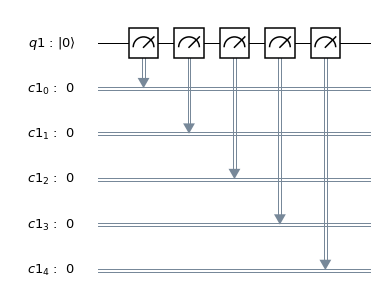

In [9]:
num_measurements = 5

q = QuantumRegister(1)
c = ClassicalRegister(num_measurements)

circ = QuantumCircuit(q,c)

for k in range(num_measurements):
    circ.measure(q[0],c[k]) 

circuit_drawer(circ, output='mpl')

To simulate this circuit, Qiskit has a `qasm_simulator` which is designed to mimic an ideal quantum device.

In [10]:
backend_sim = Aer.get_backend('qasm_simulator')

job_sim = execute(circ, backend_sim, shots=1)

result_sim = job_sim.result()

You can access the result with the `get_counts` function.

In [11]:
counts = result_sim.get_counts(circ)
print(counts)

{'00000': 1}


The printed result of the simulation shows that the qubit was prepared in the 0 state and all further measurements confirmed that the qubit was in the 0 state. The orientations of a spin {+1, -1} are relabeled {0, 1} to conveniently relate qubits to bits. The printed result is to be read from right to left, as you would extend a binary number counting from zero. The number after the colon (`:`) in the printed result is the number of times this sequence of measurement values was observed, which is 1 in this case because we only executed the simulation one time (`shots=1`).

**Insert figure of experiment 2**

A simple change in the experiment reveals the spatial nature of the spin. Now, after preparing the spin \(by measuring it with $A$\) we flip $A$ upside down, then measure $\sigma$ again. If we initially prepared $\sigma = +1$, then the flipped apparatus displays $\sigma = -1$ \(and similarly if we prepared $\sigma = -1$\). This flipping of $\sigma$ when we flip $A$ would be verified every time. We find that $\sigma$ has an orientation in space. We might be inclined to think that the spin is like a spatial vector with components $\sigma_x$, $\sigma_y$, $\sigma_z$. Let's consider another experiment to explore this hypothesis.


**Insert figure of experiment 3**

Another simple change in the experiment will reveal the counterintuitive quantum nature of spin. Now, after preparing a spin with $A$ pointed along the z axis, we rotate $A$ through an arbitrary angle, say $\pi/2$ radians \(90 degrees\) about the y axis to have $A$ pointing along the x axis, then measure $\sigma$ again.

If our hypothesis that $\sigma$ is a spatial vector is correct, then we'll have measured $\sigma_z$, then $\sigma_x$; if we prepared $\sigma_z = \pm 1$, then we should find that $\sigma_x = 0$.

However, we would find that the apparatus measures either $\sigma_x = +1$ or $\sigma_x = -1$. In fact, no matter which way $A$ is pointed, it only ever measures \(displays\) $\sigma = \pm 1$.

The second experiment showed that spin does have a spatial orientation, but the third experiment revealed that it is not described well by a spatial vector. Let's experiment further to get a better mathematical understanding of the system.


The procedures of the first two experiments followed a simple pattern when repeated in a series. Let's see what happens if we repeat the procedure in the third experiment:

1. Point $A$ along the z axis.
2. Prepare $\sigma = +1$.
3. Rotate $A$ to point along the x axis.
4. Measure $\sigma$.
5. Record the result.

The repeated procedure would result in a random series of +1 and -1. With enough repetitions, we'd find that the +1 and -1 events occur with equal frequency. In other words, the events have an equal probability of occurrence with an average value of zero.

We've found that the average of many repeated measurements is what we'd intuitively \(classically\) expect of a spatial vector, although each individual measurement is not. If the initial and final orientations of the apparatus where other than along the z and x axes, we would find the same result: an average value that agrees with the classical intuition of spatial vectors, and individual random measurements of +1 and -1 that run counter to the classical intuition.


To test your new intuition, consider what would happen if we first prepared $\sigma = +1$ along the z axis, pointed $A$ along the x axis to make a measurement, then spun $A$ back to its original orientation. If we made another measurement along the z axis, would we confirm the first result every time we ran this procedure?

The answer is... no. Consider how this scenario is similar to the third experiment. 

In this scenario, the intermediate measurement along the x axis leaves the spin in a random state prior the final measurement along the z axis. The measuring of one component \($\sigma_x$\) destroys information about another component \($\sigma_z$\). In general, any interaction that is strong enough to measure an aspect of a quantum system is necessarily strong enough to disrupt another aspect of that system.


### Logical Propositions